In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.neighbors import KernelDensity
import seaborn as sns
import pandas as pd

## Exercise 1:

a) Please create a set of 2000 random data points taken from two normal distributions with the
same standard deviation σ = 2, and different means. 25% of your points should use μ 1 = 0, the
remaining 75% μ 2 = 9

In [69]:
p1 = np.random.normal(0,2,500)
p2 = np.random.normal(9,2,1500)
#print(p1.shape)
#print(p2.shape)
p = np.concatenate((p1,p2))
print(p)

[ 0.95164598  3.40745725 -0.6437248  ...  8.74352753  7.36976622
  9.92596713]


b) Plot a histogram of the data you created in a). Select a number of bins that clearly reveals the
two Gaussians.

(2000,)


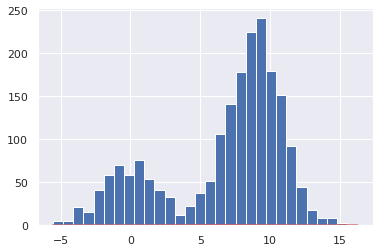

In [80]:
print (p.shape)
count, bins, ignored = plt.hist(p, 30)
plt.plot(bins, 1/(2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 6.75)**2 / (2 * 2**2) ), linewidth=2, color='r')
plt.show()

c) Apply KDE with “Gaussian” and “Linear” kernels, with bandwidths equal to 1. Plot the results.
Describe which differences you observe, and briefly explain why they arise.

(-0.02, 0.22)

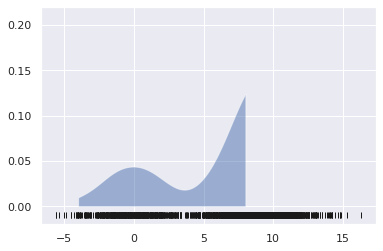

In [71]:
gaussian = KernelDensity(bandwidth=1.0, kernel='gaussian')
gaussian.fit(p[:,None])
x_d = np.linspace(-4, 8, 1000)
logprob = gaussian.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(p, np.full_like(p, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

(-0.02, 0.22)

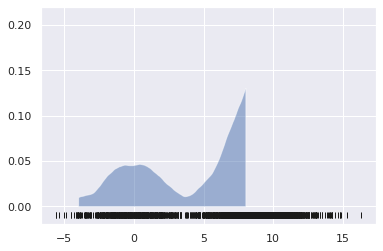

In [72]:
linear = KernelDensity(bandwidth=1.0, kernel='linear')
linear.fit(p[:,None])
x_d = np.linspace(-4, 8, 1000)
logprob = linear.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(p, np.full_like(p, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

(-0.02, 0.22)

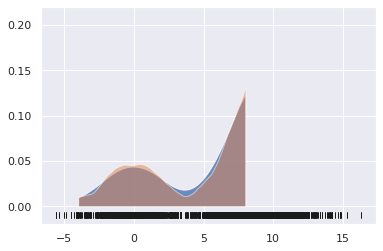

In [73]:
gaussian = KernelDensity(bandwidth=1.0, kernel='gaussian')
gaussian.fit(p[:,None])
x_d = np.linspace(-4, 8, 1000)
logprob = gaussian.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.8)
plt.plot(p, np.full_like(p, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)
linear = KernelDensity(bandwidth=1.0, kernel='linear')
linear.fit(p[:,None])
x_d = np.linspace(-4, 8, 1000)
logprob = linear.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(p, np.full_like(p, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

The Difference are observed because gausian kde tries to fit a more normalized curve vs linear where the curve consists of straighter lines 

d) Use some established heuristic to estimate the optimal bandwidth for your data. Briefly state
which heuristic you chose and what is the result. Apply KDE with a Gaussian kernel function for
the result you obtained, and for bandwidths equal to 0.07 and 2.0. Describe the differences you
observe.

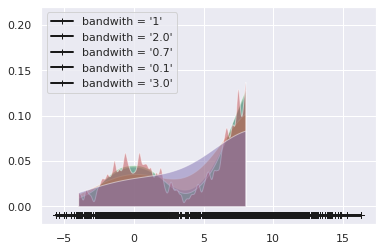

In [75]:
colors = ['blue', 'navy', 'purple','red', 'green']
bandwidths = [1,2.0,0.7,0.1,3.0]
logprob = linear.score_samples(x_d[:, None])

for color, bandwidth in zip(colors, bandwidths):
  gaussian = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(p[:,None])
  logprob = gaussian.score_samples(x_d[:, None])
  plt.fill_between(x_d, np.exp(logprob), alpha=.5)
  plt.plot(p, np.full_like(p, -0.01), '+k', markeredgewidth=1, lw=2,  linestyle='-', label="bandwith = '{0}'".format(bandwidth))
  plt.ylim(-0.02, 0.22)
  plt.legend(loc='upper left')

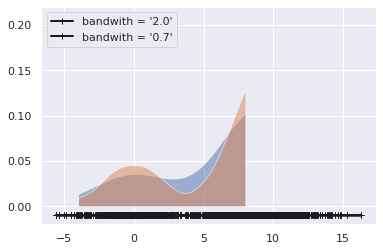

In [76]:
colors = ['navy', 'yellow']
bandwidths = [2.0,0.7]
logprob = linear.score_samples(x_d[:, None])
for color, bandwidth in zip(colors, bandwidths):
  gaussian = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(p[:,None])
  logprob = gaussian.score_samples(x_d[:, None])
  plt.fill_between(x_d, np.exp(logprob), alpha=.5)
  plt.plot(p, np.full_like(p, -0.01), '+k', markeredgewidth=1, lw=2,  linestyle='-', label="bandwith = '{0}'".format(bandwidth))
  plt.ylim(-0.02, 0.22)
  plt.legend(loc='upper left')
  

e) Briefly summarize your insights about the importance of the bandwidth and kernel function parameters in KDE.

Answer : The bandwidth of the KDE gives a distance or the scope for the data to normalize and thus we see smoother curves as we increase the bandwidth. 
Different Kernel functions in turn helps us in representing the data for better analysis.

## Exercise 2: Multidimensional Data Filtering and Visualization

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as ply
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


a) Read the data given in winequality-red.csv, available from the lecture webpage, and print the
first few rows.

In [82]:
sns.set(style="darkgrid")
data = pd.read_csv('winequality-red.csv', delimiter=';')
print(data.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


b) A numerical rating of sensory wine quality is given in the column“quality”. Display the distribution
of these scores with a histogram. What is the range of this score in the data?

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


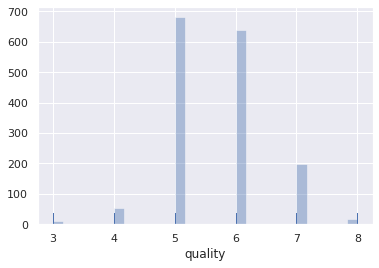

In [83]:
QUA='quality'
quality_count = data[QUA].value_counts()
sns.distplot(data['quality'],kde = False, rug = True)
print(quality_count)
plt.show()

c) Derive a coarser classification of quality into “low”, “medium”, and “high”, by grouping together the two lowest, the intermediate, and the two highest quality scores that occur in the dataset, respectively. Replace the original “quality” column with a new column “quality bin” that contains
these labels.

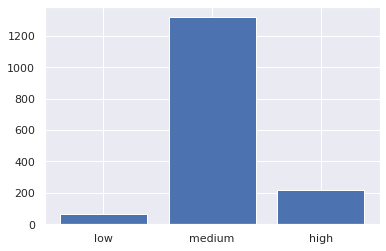

In [84]:
data['quality bin'] = data['quality'].map({3: 'low', 4: 'low', 5: 'medium',
                                  6: 'medium', 7: 'high', 8: 'high'})
data = data.drop(columns=['quality'])
quality_bin_count = data['quality bin'].value_counts()
DayOfWeekOfCall = [1,2,3]
DispatchesOnThisWeekday = [63, 1319, 217]

LABELS = ["low", "medium", "high"]
plt.bar(DayOfWeekOfCall, DispatchesOnThisWeekday, align='center')
plt.xticks(DayOfWeekOfCall, LABELS)
plt.show()

d) We would like to investigate differences between high and low quality wines. Therefore, create a
filtered data frame in which the medium-quality wines are omitted.

217
63


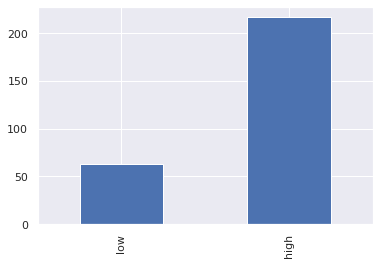

In [85]:
data_high = data[data['quality bin'] == 'high']
data_low = data[data['quality bin'] == 'low']
print(np.count_nonzero(data_high['quality bin']))
print(np.count_nonzero(data_low['quality bin']))

data_highandlow=data[data['quality bin'] != 'medium']
data_highandlow_count=data_highandlow['quality bin'].value_counts()
data_highandlow_count.loc[['low','high']].plot(kind='bar')
plt.show()

e) Visualize all numerical attributes in a scatterplot matrix. Color the two quality levels differently.
(1P) Hint: Using seaborn, you can create this plot with a single (and simple) line of code.

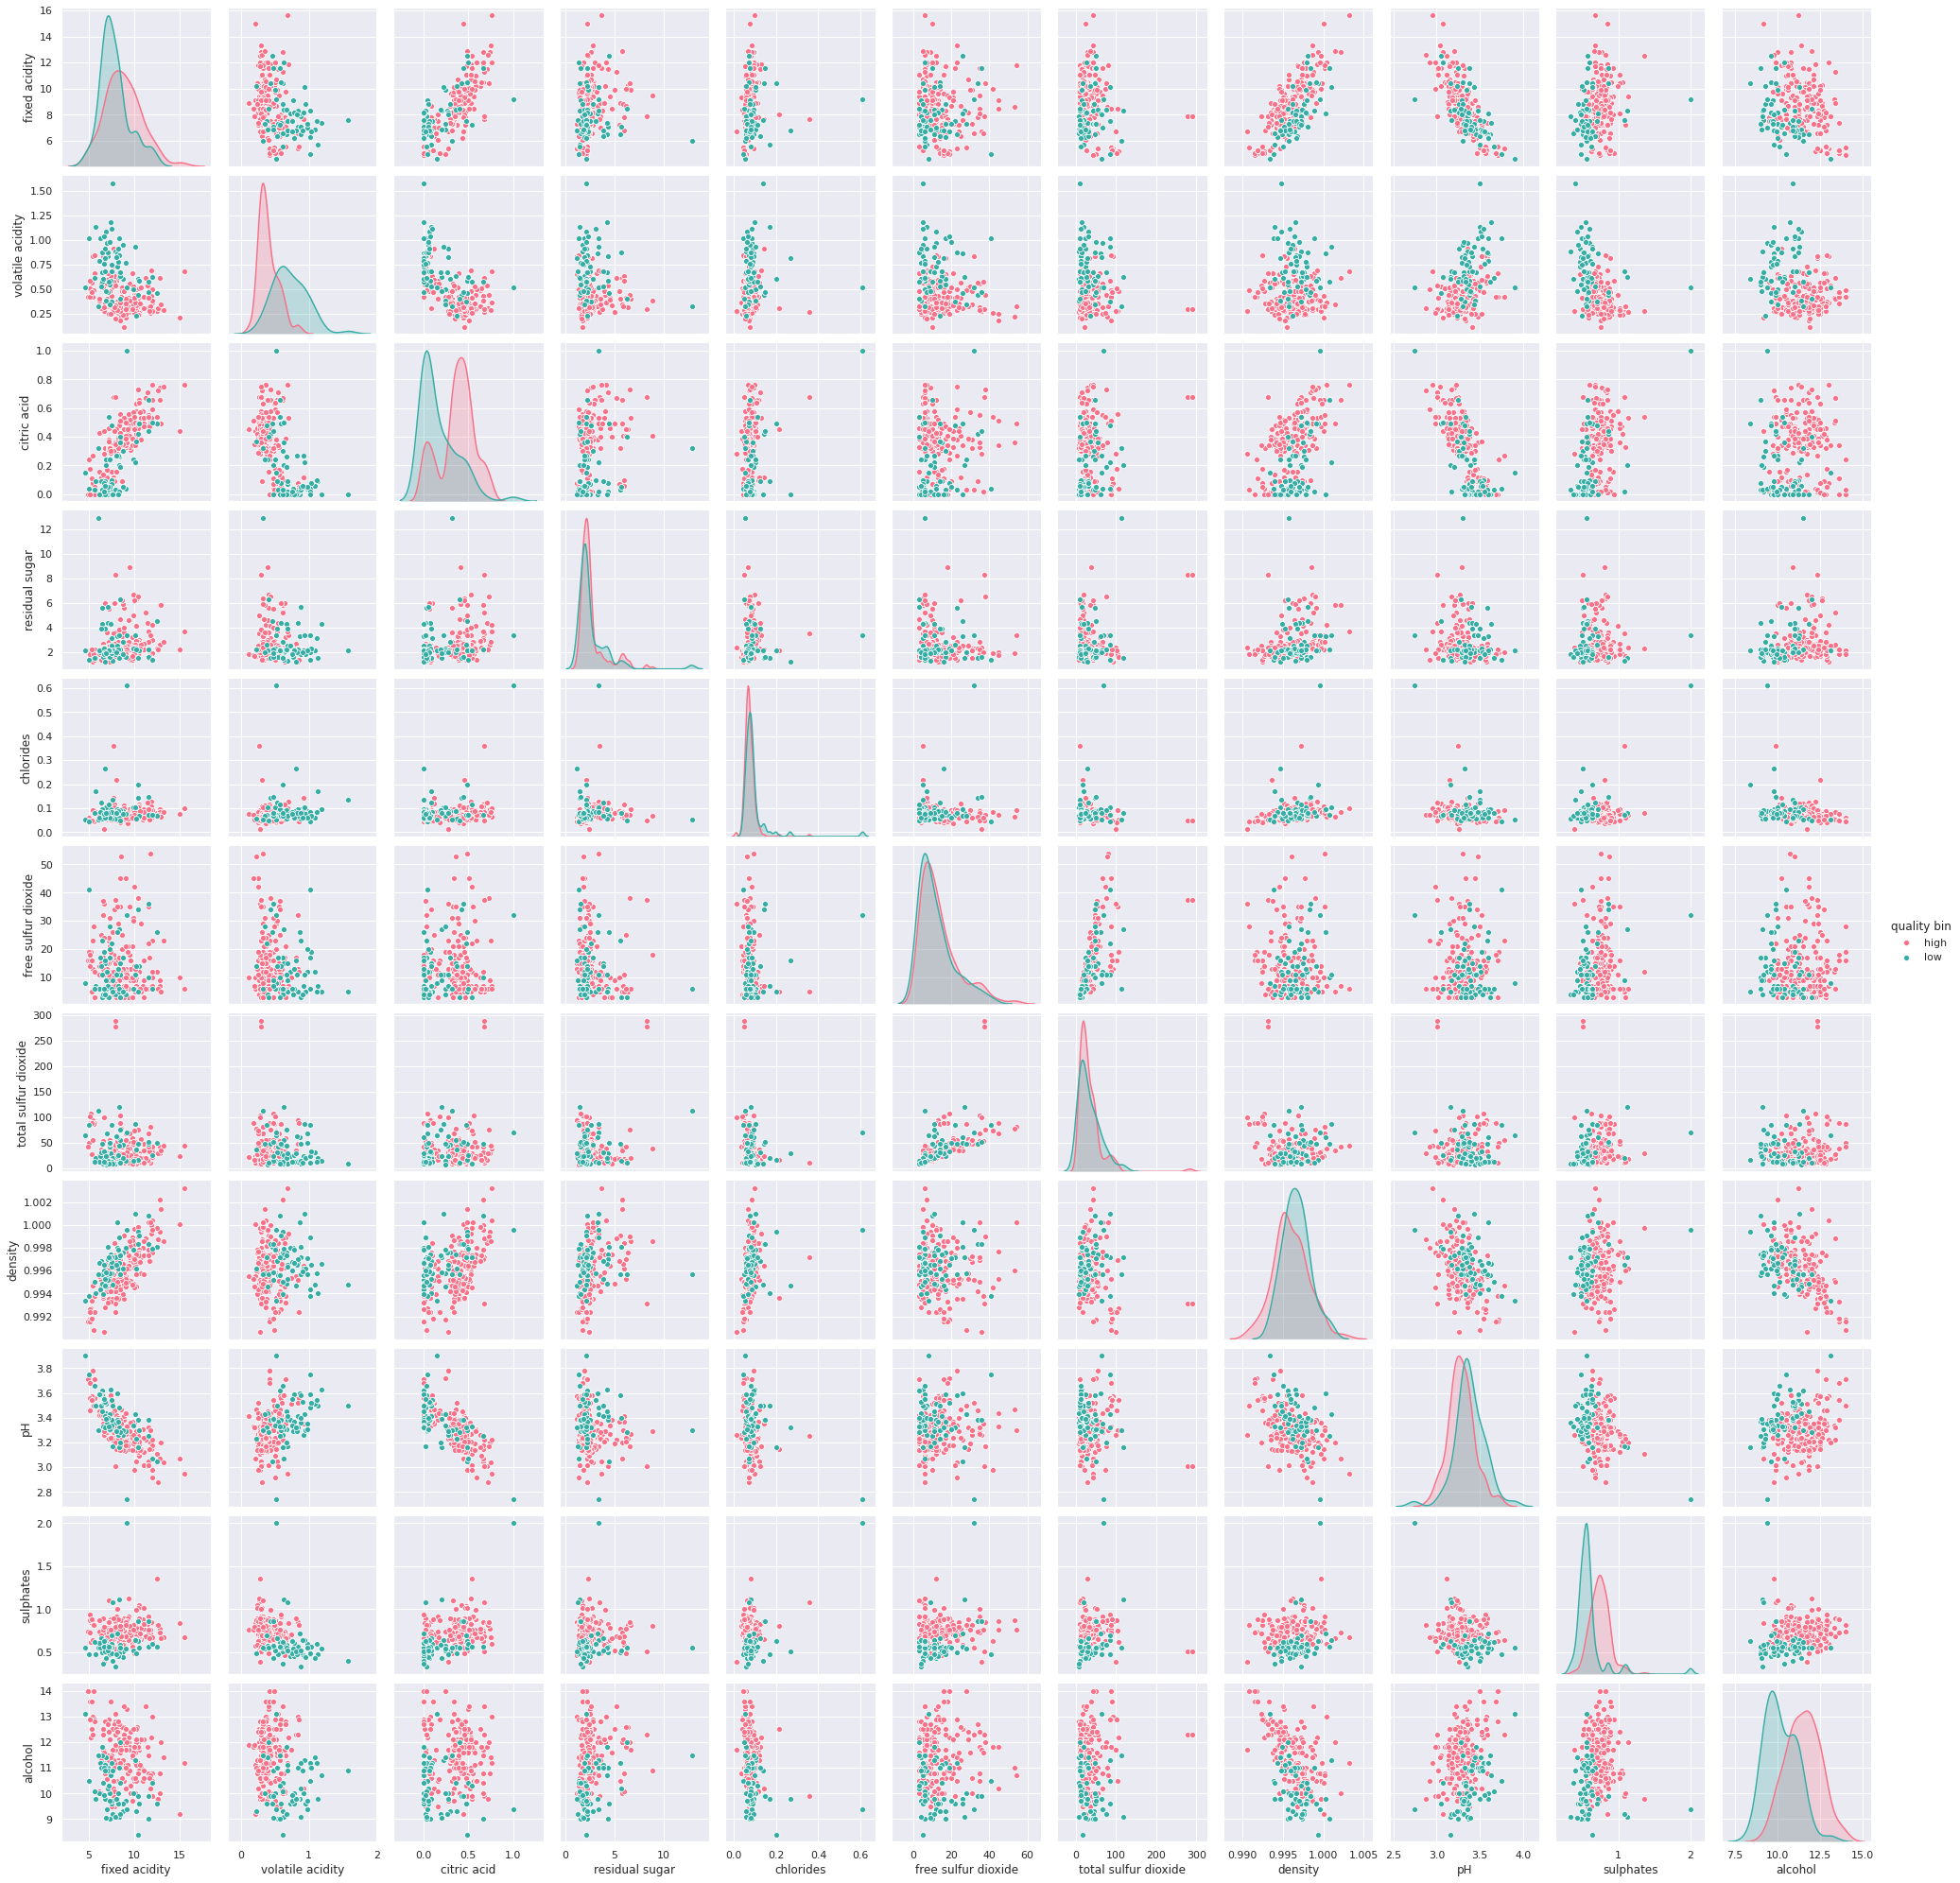

In [86]:
sns.pairplot(data_highandlow, hue='quality bin', palette="husl")
plt.show()

f) Based on the visualization, name five attributes that appear to best distinguish between high and
low quality.

Ans. 

1.   Citric Acid
2.   Sulphates
3. Volatile acidity
4. Alcohol
5. pH



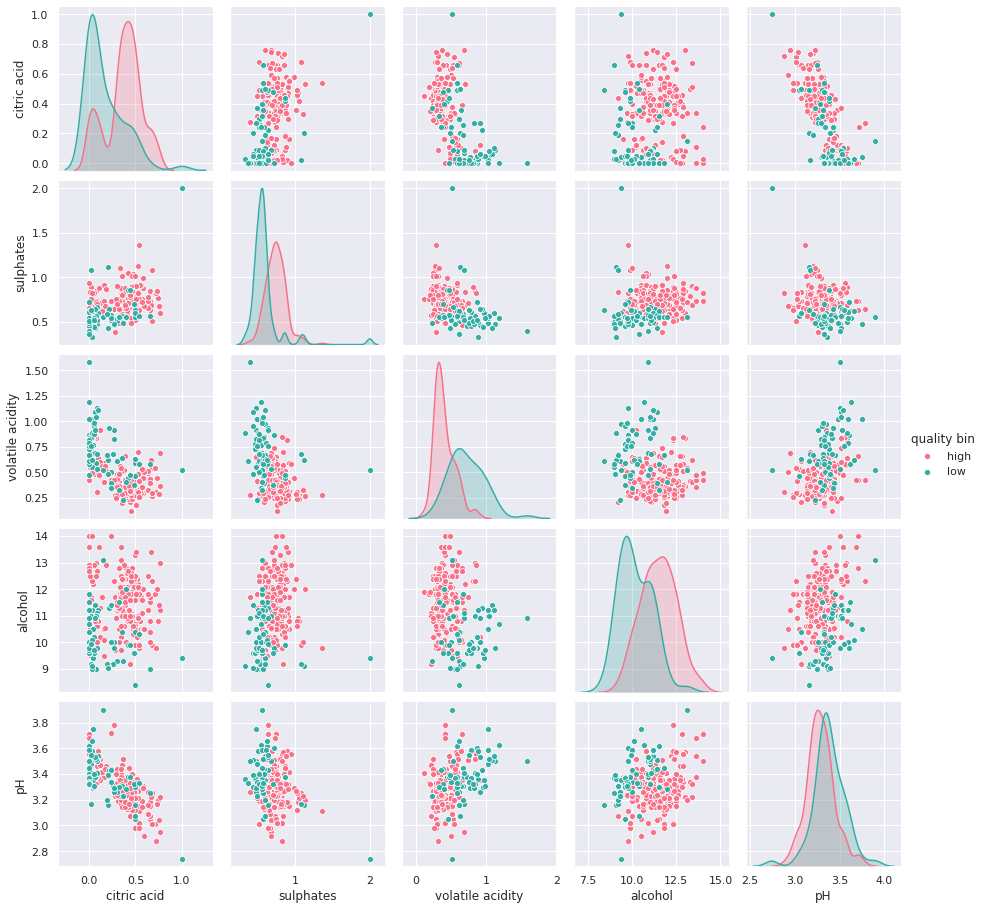

In [87]:
sns.pairplot(data_highandlow,hue="quality bin",vars=["citric acid","sulphates","volatile acidity","alcohol","pH"], palette="husl")

g) Now, use an automated feature selection technique to identify five attributes that distinguish
between high and low quality. More specifically, please use the F score from a one-way analysis
of variance (ANOVA) to rank the attributes, as implemented in scikit learn’s f_classif. What
are the five best attributes according to this measure? Are they the same as those you identified
visually? Create a filtered data frame that only contains the top five attributes, plus the “quality
bin”.

In [88]:
X = data_highandlow.drop(columns=['quality bin'])
y = data_highandlow['quality bin'].map({'low': 1, 'high': 3})
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
colnames = X.columns.values[selector.get_support()]
print(colnames)
scores = selector.scores_[selector.get_support()]
print(scores)
filtered_data=data_highandlow.drop(columns=['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density'])
print(filtered_data.head())

['volatile acidity' 'citric acid' 'pH' 'sulphates' 'alcohol']
[165.05507693  51.55456226  17.48152704  44.34563312  86.04945324]
    volatile acidity  citric acid    pH  sulphates  alcohol quality bin
7               0.65         0.00  3.39       0.47     10.0        high
8               0.58         0.02  3.36       0.57      9.5        high
16              0.28         0.56  3.30       0.75     10.5        high
18              0.59         0.08  3.38       0.50      9.0         low
37              0.38         0.28  3.23       0.73      9.7        high


h) Create a matrix similar to the one in Fig. 1: It should compare the two quality bins with respect to the five top-ranking attributes, using density estimates (on the diagonal), scatterplots (in the upper triangular part), and plots of pairwise linear regression models (in the lower triangular part). 

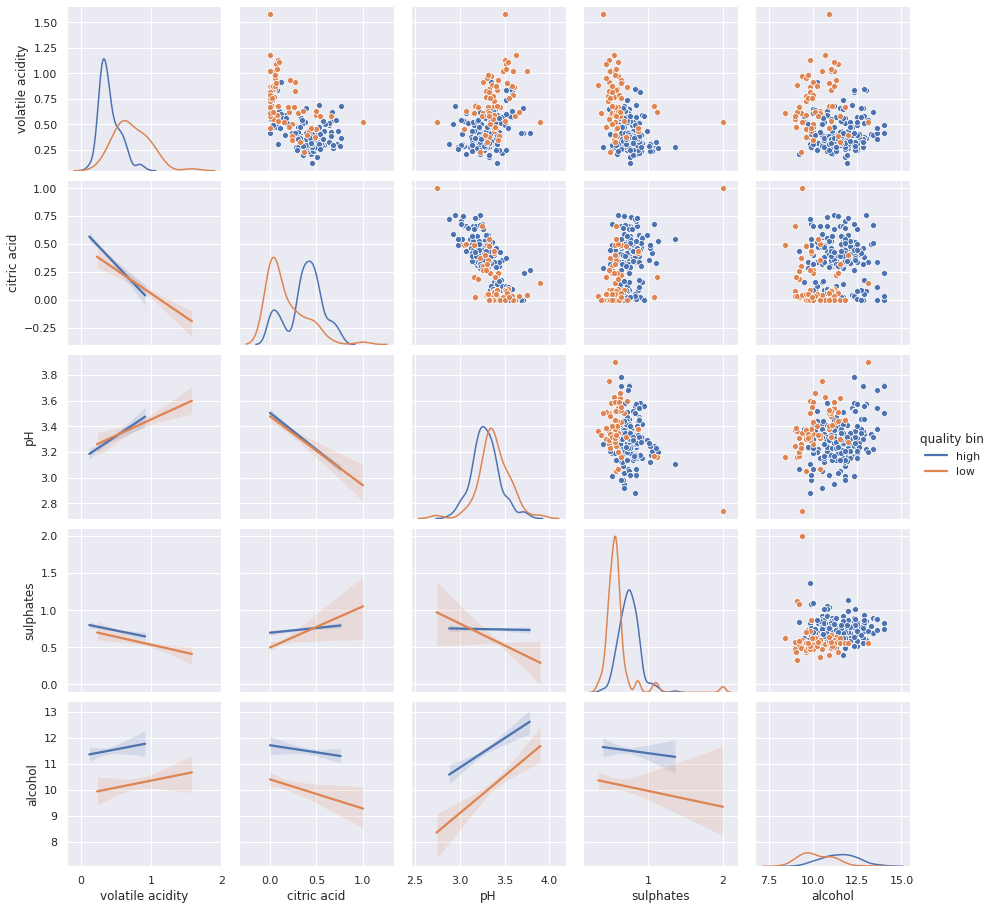

In [89]:
g = sns.PairGrid(filtered_data, hue='quality bin')
g = g.map_diag(sns.kdeplot)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.regplot, scatter=False)
g = g.add_legend()

i) Based on the visualization, which attributes appear to be strongly correlated regardless of quality?
For which attributes does the amount of correlation appear to depend on the quality? Does any
of the attributes appear to have a multimodal distribution? Point out one or multiple data points
that appear to be outliers.

Ans. Strongly Correlated depends on quality : 
1. Citric Acid, pH
2. Volatile Acidity, pH
3. Alcohol, pH

Strongly Correlated regardless of quality :
1. Sulphate and Citric Acid
2. Sulphate and pH


Multimodal Distribution :
1. Citric Acid

Outliers :
1. Volatile Acidity
2. Citric Acid
3. Sulphate


j) Compute the distance consistency of all scatter plots. Which pair of variables leads to the highest distance consistency?




In [90]:
def getDistance(centroid,cluster):
    diff = cluster - centroid
    dist = np.sqrt(np.square(diff).sum(axis=1))
    return dist

def distanceConsistency(df,cols,cls):
    
#     getting labels (high and low)
    clustersLabel = pd.unique(df[cls].values.ravel('K'))
    
#     separting clusters
    clusters = []
    for label in clustersLabel:
        clusterDf = df[df[cls] == label]
        clusterDf = clusterDf[cols]
        clusters.append(clusterDf)
    
#     calculating centroids for each cluster
    centroids = []
    for cluster in clusters:
        centroid = cluster.mean()
        centroids.append(centroid)
        
    
    closerCount = 0
    for i in range(len(clusters)):
        cluster = clusters[i]
        distances = np.empty((len(centroids),cluster.shape[0]))
        for j in range(len(centroids)):
            centroid = centroids[j]
            # calculating euclidean distances
            distance = getDistance(centroid,cluster)
            distances[j] = distance
        
        #getting indexes with minimum cluster distances and matching with current ith cluster
        minEl = np.argmin(distances,axis=0)
        closerCount +=  np.count_nonzero(minEl == i)
    
    return closerCount*100/df.shape[0]

columns = filtered_data.columns.drop("quality bin")

for attribute in columns:
    for attribute2 in columns:
        if attribute != attribute2 :
            dsc = distanceConsistency(filtered_data,cols=[attribute,attribute2],cls="quality bin")
            print("Distance Consistency using %s and %s is %.2f percent" % (attribute,attribute2,dsc))
            print("")
    
    columns = columns.drop(attribute)

Distance Consistency using volatile acidity and citric acid is 77.86 percent

Distance Consistency using volatile acidity and pH is 81.43 percent

Distance Consistency using volatile acidity and sulphates is 83.93 percent

Distance Consistency using volatile acidity and alcohol is 73.21 percent

Distance Consistency using citric acid and pH is 76.07 percent

Distance Consistency using citric acid and sulphates is 77.14 percent

Distance Consistency using citric acid and alcohol is 73.57 percent

Distance Consistency using pH and sulphates is 79.64 percent

Distance Consistency using pH and alcohol is 71.79 percent

Distance Consistency using sulphates and alcohol is 71.79 percent

